In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model

In [3]:
df = pd.read_csv("./ECGDataset/ecg_autoencoder_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [4]:
X = df.loc[:,:]
y = df[140]
print(X.shape)
print(y.shape)

(4998, 141)
(4998,)


In [5]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: 140, Length: 4998, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=20)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (3998, 141)
Shape of y_train is (3998,)
Shape of X_test is (1000, 141)
Shape of y_test is (1000,)


In [7]:
scaler = MinMaxScaler()
fit_scaler = scaler.fit(X_train)

In [8]:
X_train_Scaled = fit_scaler.transform(X_train)
X_test_Scaled = fit_scaler.transform(X_test)

In [9]:
X_train_Scaled[0]

array([0.51285844, 0.44897834, 0.26383866, 0.16173581, 0.1917007 ,
       0.2707352 , 0.39367037, 0.47583217, 0.41167049, 0.50407955,
       0.61413414, 0.59903551, 0.57081099, 0.5774834 , 0.57258009,
       0.53947562, 0.50850529, 0.56343495, 0.58532307, 0.62725668,
       0.64924435, 0.59772825, 0.57586713, 0.5990182 , 0.60499994,
       0.64107259, 0.61612099, 0.54847595, 0.47547985, 0.55768326,
       0.61444299, 0.5886754 , 0.55839107, 0.55779308, 0.56387025,
       0.62921054, 0.63010725, 0.64333003, 0.59906438, 0.6577647 ,
       0.72996881, 0.72726162, 0.67166516, 0.7389396 , 0.71664653,
       0.58378768, 0.48298355, 0.6215753 , 0.70579485, 0.71716389,
       0.69821381, 0.6654874 , 0.61705149, 0.59251779, 0.60614144,
       0.60279307, 0.60539773, 0.6148227 , 0.6458533 , 0.66264668,
       0.67432297, 0.66887471, 0.70572659, 0.74216134, 0.75442041,
       0.79143582, 0.77683705, 0.79276792, 0.72938284, 0.76975915,
       0.77629453, 0.72179254, 0.7229949 , 0.69358408, 0.73633

In [10]:
X_test_Scaled[0]

array([0.40315024, 0.33812855, 0.10862384, 0.12452978, 0.21272369,
       0.36892781, 0.48425579, 0.48985754, 0.50009837, 0.6177505 ,
       0.67650295, 0.60844031, 0.56595668, 0.58441805, 0.61922151,
       0.59153174, 0.54247852, 0.60944803, 0.61114643, 0.66240708,
       0.69187042, 0.67448687, 0.66499123, 0.67780518, 0.68088591,
       0.64802267, 0.63296781, 0.61022639, 0.5807453 , 0.66317495,
       0.693319  , 0.67034547, 0.69576437, 0.66982992, 0.61398266,
       0.71159887, 0.71871587, 0.71436326, 0.68340636, 0.72533965,
       0.78356966, 0.79511291, 0.74504872, 0.78566208, 0.78249564,
       0.75705566, 0.69787722, 0.70949959, 0.7482016 , 0.73498802,
       0.67893303, 0.66626438, 0.64642067, 0.61555892, 0.61498754,
       0.60664677, 0.58881038, 0.58409208, 0.68213315, 0.71212156,
       0.70489088, 0.6864392 , 0.70792414, 0.72594194, 0.68206164,
       0.70499051, 0.73442078, 0.73130631, 0.73803221, 0.75009866,
       0.74401945, 0.71913131, 0.71054572, 0.65425911, 0.71981

In [11]:
normal_train_data = pd.DataFrame(X_train_Scaled).add_prefix("c").query("c140 == 1.0").values[:,:-1]
anamoly_train_data = pd.DataFrame(X_train_Scaled).add_prefix("c").query("c140 == 0.0").values[:,:-1]
print(f"Shape of normal_train_data is {normal_train_data.shape}")
print(f"Shape of anamoly_train_data is {anamoly_train_data.shape}")

Shape of normal_train_data is (2334, 140)
Shape of anamoly_train_data is (1664, 140)


In [12]:
normal_test_data = pd.DataFrame(X_test_Scaled).add_prefix("c").query("c140 == 1.0").values[:,:-1]
anamoly_test_data = pd.DataFrame(X_test_Scaled).add_prefix("c").query("c140 == 0.0").values[:,:-1]
print(f"Shape of normal_test_data is {normal_test_data.shape}")
print(f"Shape of anamoly_test_data is {anamoly_test_data.shape}")

Shape of normal_test_data is (585, 140)
Shape of anamoly_test_data is (415, 140)


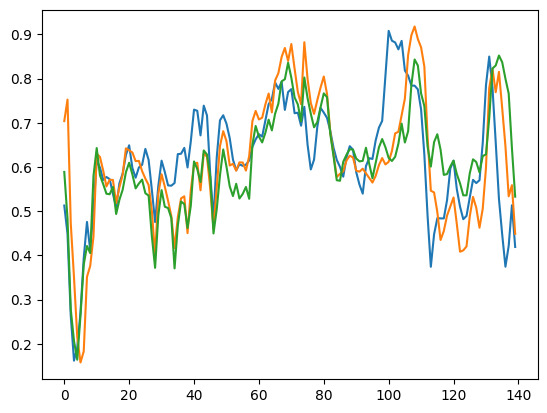

In [13]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])
plt.show()

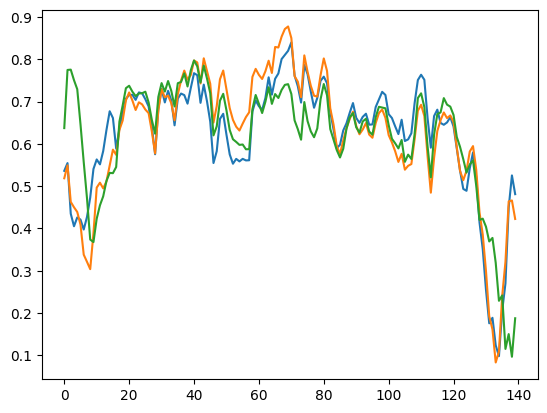

In [14]:
plt.plot(anamoly_train_data[0])
plt.plot(anamoly_train_data[1])
plt.plot(anamoly_train_data[2])
plt.show()

In [15]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(8, activation="relu"),
        ])
        self.decoder = keras.Sequential([
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(140, activation="sigmoid"),
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [16]:
model = AutoEncoder()

model.compile(
    optimizer="adam",
    loss="mae"
)

history = model.fit(
    normal_train_data, normal_train_data,
    epochs=50,
    batch_size=128,
    validation_data = (X_train_Scaled[:,:-1], X_train_Scaled[:,:-1])
)

Epoch 1/50
19/19 [==============================] - 2s 21ms/step - loss: 0.1338 - val_loss: 0.1120
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0811 - val_loss: 0.0821
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0531 - val_loss: 0.0767
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0476 - val_loss: 0.0752
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0467 - val_loss: 0.0746
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.0747
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0464 - val_loss: 0.0743
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0464 - val_loss: 0.0741
Epoch 9/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.0737
Epoch 10/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0460 - val_loss: 0.0735
Epoch 11/50
19/19 

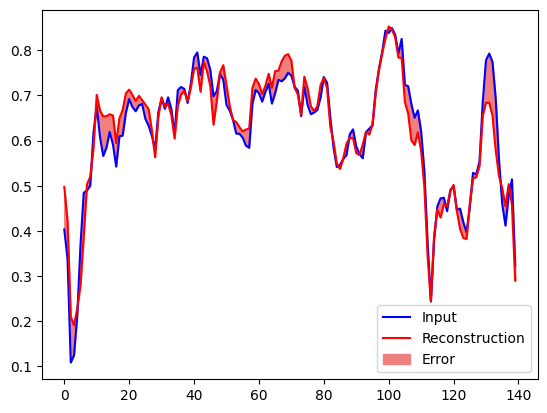

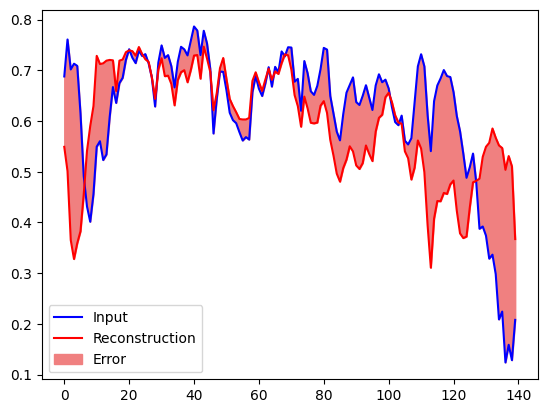

In [17]:
def plot(data, n):
    enc_img= model.encoder(data)
    dec_img = model.decoder(enc_img)
    plt.plot(data[n], 'b')
    plt.plot(dec_img[n], 'r')
    plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
    plt.legend(labels=['Input', 'Reconstruction', 'Error'])
    plt.show()

plot(normal_test_data, 0)
plot(anamoly_test_data, 0)

In [20]:
def calThreshold(model, X_train_Scaled):
    reconstruction = model.predict(X_train_Scaled)
    reconstruction_error = keras.losses.msle(reconstruction, X_train_Scaled)
    threshold = np.mean(reconstruction_error.numpy()) + 0.05*np.std(reconstruction_error.numpy())
    return threshold

In [21]:
threshold = calThreshold(model, X_train_Scaled[:,:-1])
print(threshold)

125/125 [==============================] - 0s 1ms/step
0.003907274749235871


In [30]:
def calpredictions(model, X_test_Scaled, threshold):
    reconstruction = model.predict(X_test_Scaled)
    reconstruction_error = keras.losses.msle(reconstruction, X_test_Scaled)
    errors = tf.keras.losses.msle(reconstruction,X_test_Scaled)
    mask = pd.Series(errors) > threshold
    pred = mask.map(lambda x : 0.0 if x == True else 1.0)
    return pred

In [32]:
predictions = calpredictions(model,X_test_Scaled[:,:-1],threshold)
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test)*100)

32/32 [==============================] - 0s 1ms/step
96.8
